### Import Packages & Read In Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
data=pd.read_csv('data\kc_house_data.csv')

###   True Relationship is Linear Check

In [11]:
y_check = data['price']
X_check = pd.get_dummies(data[['sewer_system','heat_source','grade','condition']])
model = sm.OLS(y_check,sm.add_constant(X_check)).fit()


In [12]:
dp = pd.concat([X_check,y_check],axis=1)
dp.corr().price.sort_values(ascending=False)

price                              1.000000
grade_11 Excellent                 0.317190
grade_10 Very Good                 0.300315
grade_12 Luxury                    0.282957
grade_9 Better                     0.202575
grade_13 Mansion                   0.198060
heat_source_Gas                    0.143009
heat_source_Gas/Solar              0.036684
condition_Average                  0.036382
sewer_system_PUBLIC                0.021788
condition_Very Good                0.008617
grade_1 Cabin                      0.002217
heat_source_Other                  0.001132
sewer_system_PUBLIC RESTRICTED    -0.001262
heat_source_Oil/Solar             -0.002266
sewer_system_PRIVATE RESTRICTED   -0.005218
grade_2 Substandard               -0.007323
heat_source_Electricity/Solar     -0.008419
grade_3 Poor                      -0.014922
grade_8 Good                      -0.018796
grade_4 Low                       -0.021569
sewer_system_PRIVATE              -0.021625
condition_Poor                  

> 0.1 to 0.3 small correlation

> 0.3 to 0.5 medium correlation

>0.5 to 1 large correlation

### Multicollinearity Check

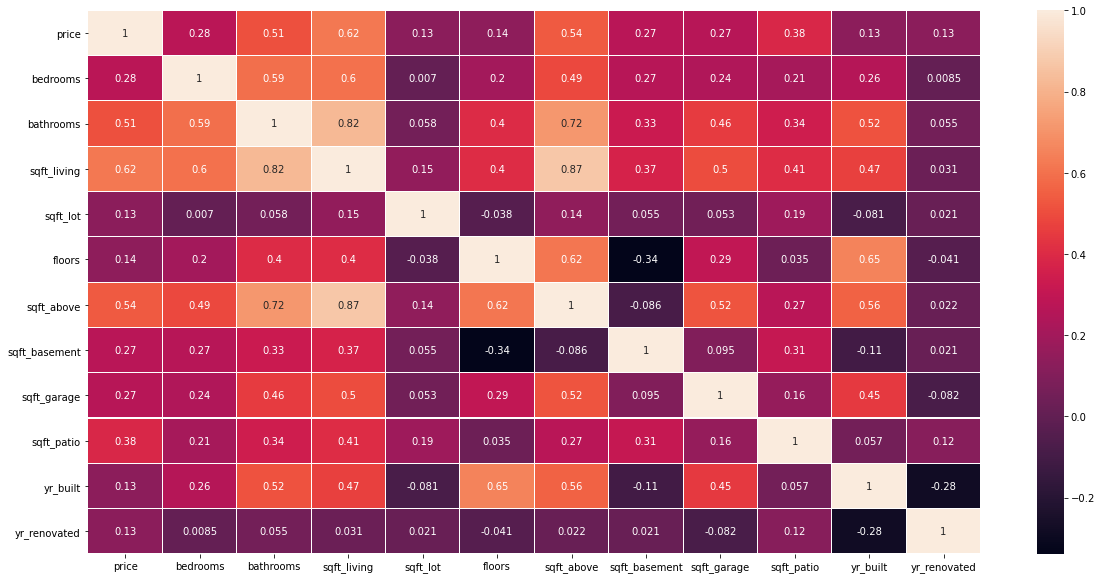

In [28]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(nice_houses.corr(), annot=True, linewidths=.1)

# Data Cleaning

In [13]:
# Dropping houses with grade "5 Fair" and below 

nice_houses = data.drop(data[data.grade.isin(["5 Fair", "4 Low", "3 Poor", "2 Substandard", "1 Cabin"])].index)

In [14]:
# Dropping houses with no bedrooms

nice_houses = nice_houses.loc[(nice_houses['bedrooms']!=0)]

In [15]:
# Dropping houses with no bathrooms

nice_houses = nice_houses.loc[(nice_houses['bathrooms']!=0)]

In [16]:
# Dropping lat, long, and id columns.

nice_houses.drop(columns= ['lat', 'long', 'id'], inplace=True)

In [17]:
# Adding zip code column

nice_houses['zip'] = nice_houses['address'].str.extract(r'(\d{5}-?\d{0,4})')


In [18]:
# Filtering by zip codes with strong school districts

top_school_districts = ['98004', '98005', '98007', '98008', '98039', '98052', '98074', '98033', '98006', '98053', '98034', '98075', '98029', '98027', '98011', '98040', '98028', '98072', '98077', '98059', 
                        '98155', '98038', '98024', '98065', '98177']

nice_houses = nice_houses.loc[nice_houses['zip'].isin(top_school_districts)]


In [19]:
# Filtering by zip codes based on cost of living
livingcost_zip_code = ['98074', '98065', '98019', '98052', '98077', '98029', '98075', '98010', '98038', '98053', '98028', 
                       '98005', '98033', '98034', '98004', '98042', '98006', '98007', '98011', '98045', '98121', '98092', '98039', '98008', '98059']

nice_houses = nice_houses.loc[nice_houses['zip'].isin(livingcost_zip_code)]

In [20]:
#Dropping sewer system and heat source
nice_houses=nice_houses.drop(columns=['sewer_system','heat_source'])
nice_houses.info()#Sanity Check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 20 to 30131
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3267 non-null   object 
 1   price          3267 non-null   float64
 2   bedrooms       3267 non-null   int64  
 3   bathrooms      3267 non-null   float64
 4   sqft_living    3267 non-null   int64  
 5   sqft_lot       3267 non-null   int64  
 6   floors         3267 non-null   float64
 7   waterfront     3267 non-null   object 
 8   greenbelt      3267 non-null   object 
 9   nuisance       3267 non-null   object 
 10  view           3267 non-null   object 
 11  condition      3267 non-null   object 
 12  grade          3267 non-null   object 
 13  sqft_above     3267 non-null   int64  
 14  sqft_basement  3267 non-null   int64  
 15  sqft_garage    3267 non-null   int64  
 16  sqft_patio     3267 non-null   int64  
 17  yr_built       3267 non-null   int64  
 18  yr_ren